In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

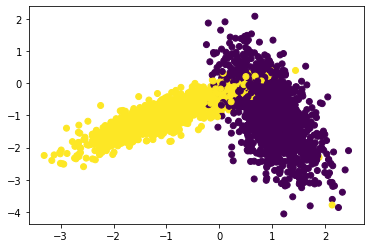

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [21]:
from sklearn.metrics import accuracy_score
import random 
from tqdm import tqdm

def RandomSearchCV(x_train, y_train, knn_ , params_range, folds):
    trainscores = []
    cvscores  = [] 

    #Randomly selected numbers from params_range
    params_list =  random.sample(range(0, params_range), 10)
    params_list.sort()    
    params = {'n_neighbors': params_list}

    #for each hyperparameter that we generated
    for i in tqdm(params['n_neighbors']):
        train_scores_folds = []
        cv_scores_folds  = []

        #devide numbers ranging from  0 to len(X_train) into groups= folds
        for j in range(0, folds): #fold = [1,2,3]
            #formulae for finding length
            Values = (len(x_train)/ (folds))
            #covert into integer values
            Val = int(Values)


            
            cv_list =list(set(list(range((Val*j), (Val*(j+1))))))
            train_list = list(set(list(range(0, len(x_train)))) - set(cv_list))
            #selecting the data points based on the train_indices and cv_indices
            X_train = x_train[train_list]
            Y_train = y_train[train_list]
            X_test  = x_train[cv_list]
            Y_test  = y_train[cv_list]
        
            # based on fold values finding train and test accuracies
            knn_.n_neighbors = i
            knn_.fit(X_train,Y_train)
            Y_pred = knn_.predict(X_test)
            cv_scores_folds.append(accuracy_score(Y_test, Y_pred))
            Y_pred = knn_.predict(X_train)
            train_scores_folds.append(accuracy_score(Y_train, Y_pred))

        ## finding the mean of train accuracies
        trainscores.append(np.mean(np.array(train_scores_folds)))
        cvscores.append(np.mean(np.array(cv_scores_folds)))

    return trainscores,cvscores,params


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

[1.0, 0.9588666666666666, 0.9592, 0.9572666666666666, 0.9580000000000001, 0.9579333333333334, 0.9579333333333334, 0.9582, 0.9578000000000001, 0.9581333333333334]
[0.9296000000000001, 0.9544, 0.9544, 0.9541333333333334, 0.9561333333333333, 0.9561333333333333, 0.9556, 0.956, 0.9565333333333333, 0.9558666666666666]


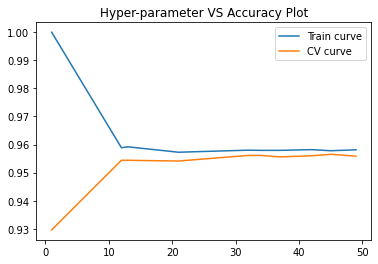

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
knn_class = KNeighborsClassifier()
paramrange = 50
folds = 3
trainscores, cvscores, params = RandomSearchCV(X_train, y_train, knn_class, paramrange, folds)
print(trainscores)
print(cvscores)
plt.plot(params['n_neighbors'],trainscores, label='Train curve')
plt.plot(params['n_neighbors'],cvscores, label='CV curve')
plt.title('Hyper-parameter VS Accuracy Plot')
plt.legend()
plt.show()

In [24]:
# taking it from reference 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

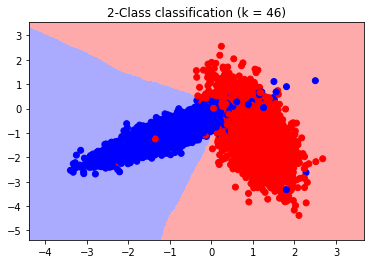

In [25]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 46)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)